In [1]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns 
from os import getcwd
from os.path import dirname 

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines


In [2]:
# define path
path = dirname(getcwd()) + '/'

# get turku data for plotting 
corrs_turku = dict(np.load(path + 'data/corrs_turku.npz'))
corrs_turku = pd.DataFrame(corrs_turku).transpose()
corrs_turku.columns = ['rho', 'pspin']
nulls_turku = dict(np.load(path + 'data/nulls_turku.npz'))

# get enigma data for plotting
corrs_enigma= dict(np.load(path + 'data/corrs_enigma.npz'))
corrs_enigma = pd.DataFrame(corrs_enigma).transpose()
corrs_enigma.columns = ['rho', 'pspin']
nulls_enigma = dict(np.load(path + 'data/nulls_enigma.npz'))

# relabeling etc 
target_labels = pd.read_csv(path + 'data/target_labels.csv')
alt_target_labels = pd.read_csv(path + 'data/alt_target_labels.csv')

# merge, fdr correction, display discovery sample

In [3]:
# merge source labels etc for plotting and results 
df_turku = pd.merge(target_labels, corrs_turku, left_on='source', right_index=True)

# do multiple comparisons correction
_, fdr_corrected_pvalues, _, _ = multipletests(df_turku['pspin'], alpha=0.05, method='fdr_bh')
df_turku['fdr_corrected_p_value'] = fdr_corrected_pvalues

# show 
display(df_turku)

# save
df_turku.to_csv(path + '/tables/correlations_in_discovery_sample.csv', index=False)

,source,class,target,rho,pspin,fdr_corrected_p_value
0,kaller2017_sch23390,dopamine,D1,-0.136113,0.252275,0.315343
1,jaworska2020_fallypride,dopamine,D2,-0.151458,0.164884,0.215065
2,beliveau2017_dasb,serotonin,5-HTT,-0.404191,0.001800,0.007714
3,savli2012_way100635,serotonin,5-HT1A,-0.223089,0.067293,0.106253
4,beliveau2017_az10419369,serotonin,5-HT1B,0.198970,0.109589,0.149440
5,beliveau2017_cimbi36,serotonin,5-HT2A,0.377866,0.001200,0.007199
6,beliveau2017_sb207145,serotonin,5-HT4,0.275148,0.018998,0.035621
7,radnakrishnan2018_gsk215083,serotonin,5-HT6,0.064869,0.593041,0.635401
8,tuominen_feobv,acetylcholine,vAChT,-0.321012,0.006299,0.017180
9,hillmer2016_flubatine,acetylcholine,$\alpha4 \beta2*$,0.366287,0.004900,0.014999


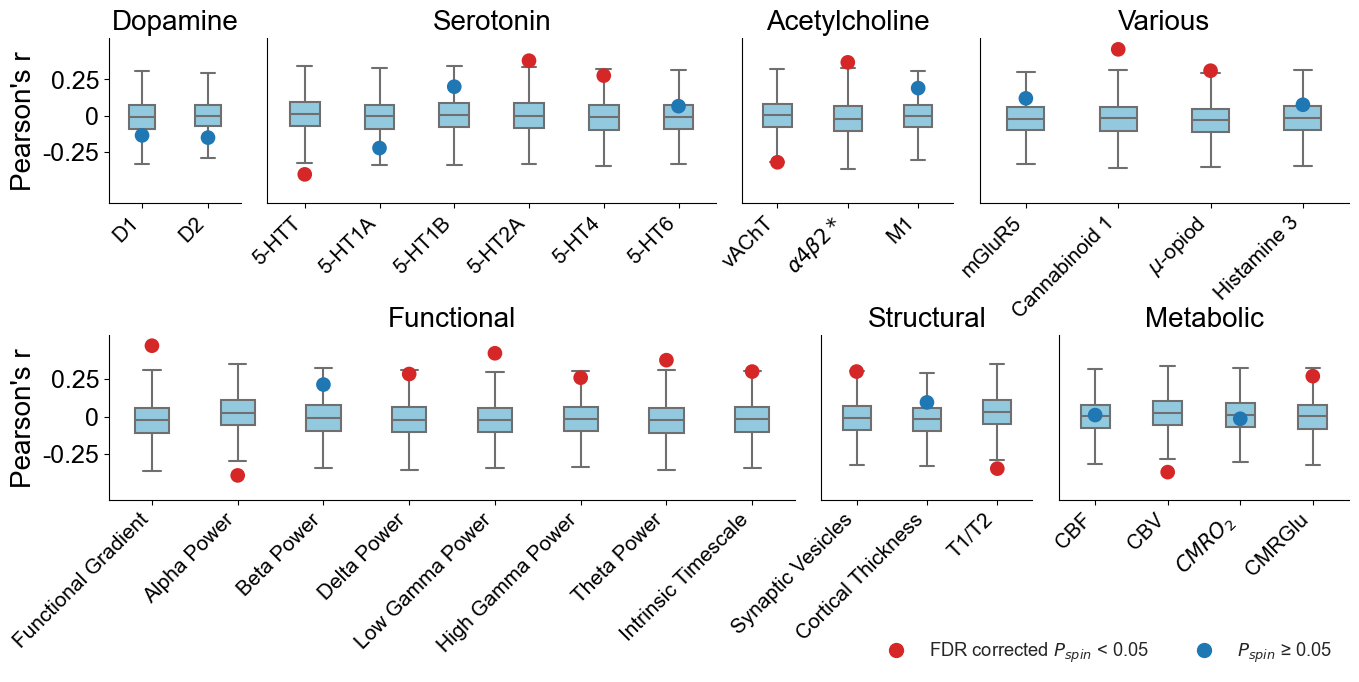

In [4]:
#plt 
# make subplots in this order  
plot_order = ["dopamine", "serotonin", "acetylcholine", "various", "functional", "structural", "metabolic"]

fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(2, 16, hspace=0.8, wspace=0.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

f_ax1 = fig.add_subplot(gs[0, 0:2]) # dopamine
f_ax2 = fig.add_subplot(gs[0, 2:8], sharey=f_ax1) # 5-HT
f_ax3 = fig.add_subplot(gs[0, 8:11], sharey=f_ax1) # ACh
f_ax4 = fig.add_subplot(gs[0, 11:], sharey=f_ax1) # various

f_ax5 = fig.add_subplot(gs[1, 0:9]) # functional
f_ax6 = fig.add_subplot(gs[1, 9:12], sharey=f_ax5) # structural
f_ax7 = fig.add_subplot(gs[1, 12:], sharey=f_ax5) # metabolic

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

for i,ax in enumerate(fig.get_axes()):
    corrs = df_turku[df_turku['class'] == plot_order[i]]
    nulls = pd.DataFrame(np.column_stack([nulls_turku.get(s) for s in corrs['source']]))
    nulls.columns = list(corrs['source'])

    color = ((corrs['pspin'] > 0.05).astype(int)).tolist()
    color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]
    
    x = np.arange(corrs.shape[0])
    cpalette = dict(zip(x, color))
    
    ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue', ax=ax);
    ax2 = sns.pointplot(x=x,
                  y=corrs['rho'],
                  palette=cpalette,
                  join = False , 
                  scale=1.2,
                  ax=ax1);

    # make pretty
    children1 = ax1.get_children()
    children2 = ax2.get_children()

    # Set the zorder of the children of the boxplot to 1
    for child in children1:
        child.set_zorder(10)

    # Set the zorder of the children of the pointplot to 2
    for child in children2:
        child.set_zorder(20)

    ax1.set_axisbelow(True)
    
    ax1.set_title(plot_order[i].capitalize(), fontsize=20)
    if i in [0,4]:
        ax1.set(yticks=[-.25, 0, .25])
        ax1.set_yticklabels([ '-0.25', '0', '0.25'], fontsize=30)
        ax1.set_ylabel("Pearson's r", fontsize=20)
        ax1.tick_params(axis='y', labelsize=18)
    else:
        ax1.tick_params(axis='y', which='both', length=0, labelleft=False)
        ax1.set_ylabel(None)
        ax1.spines['left'].set_visible(True)
        
    ax1.set_xticklabels(list(corrs['target']), rotation=45, ha="right", fontsize=15)
    
# legend
blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='FDR corrected $P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )

plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

plt.savefig(path + 'figures/Figure2.jpg', bbox_inches="tight", dpi=300) 

# Alternative tracers in the discovery sample

In [5]:
df_turku_alt = pd.merge(alt_target_labels, corrs_turku, left_on='source', right_index=True)
display(df_turku_alt)

# save table
df_turku_alt.to_csv(path + '/tables/alternative_tracers_discovery_sample.csv', index=False)

,source,class,target,rho,pspin
0,sandiego2015_flb457,dopamine,D2,-0.000058,0.999600
1,fazio2016_madam,serotonin,5-HTT,-0.340886,0.004100
2,beliveau2017_cumi101,serotonin,5-HT1A,-0.031009,0.792221
3,savli2012_p943,serotonin,5-HT1B,0.176320,0.138986
4,savli2012_altanserin,serotonin,5-HT2A,0.036385,0.738126
5,normandin2015_omar,various,Cannabinoid 1,0.344504,0.005099


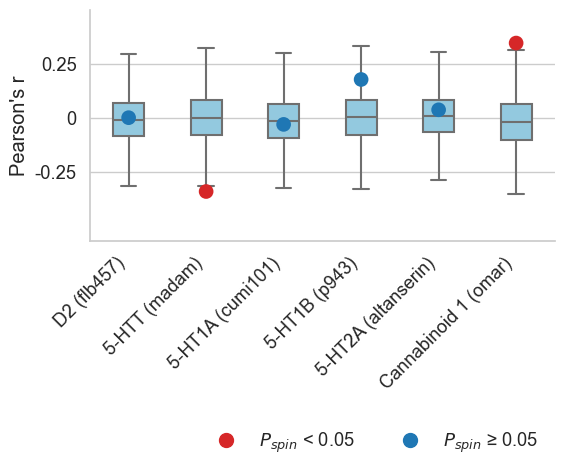

In [6]:
# plot alternative 
df_turku_alt['xlabel'] = df_turku_alt['target'] + ' (' + [s.split('_')[1] for s in df_turku_alt['source']]  + ')' # labels
nulls = pd.DataFrame(np.column_stack([nulls_turku.get(s) for s in df_turku_alt['source']]))
nulls.columns = list(df_turku_alt['source'])

color = ((df_turku_alt['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]

x = np.arange(df_turku_alt.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(6,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_turku_alt["rho"],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25], ylabel="Pearson's r")
ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(df_turku_alt['xlabel'], rotation=45, ha="right")


blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

plt.savefig(path + 'figures/Supp_Fig3.jpg', bbox_inches="tight", dpi=300) 

# Replicate in ENIGMA

In [7]:
replicate = df_turku[df_turku['fdr_corrected_p_value']< 0.05]['source'] # select sources 
df_enigma = corrs_enigma[corrs_enigma.index.isin(replicate)] # select enigma 
df_enigma = pd.merge(target_labels, df_enigma,  how='right', right_index=True, left_on='source') # add target labels

custom_order = {v: i for i, v in enumerate(plot_order)} # sorting order 
df_enigma = df_enigma.sort_values(by=['class'], key=lambda x: x.map(custom_order)) # sort for pretty 

functional = df_enigma[df_enigma['source'].str.contains('meg') ] # also sort meg logically
functional = functional.sort_values(by=['source'])
df_enigma = df_enigma.reset_index(drop=True)
df_enigma.iloc[8:14] = functional

# correct for multiple comparisons 
_, fdr_corrected_pvalues, _, _ = multipletests(df_enigma['pspin'], alpha=0.05, method='fdr_bh')
df_enigma['fdr_corrected_p_value'] = fdr_corrected_pvalues

display(df_enigma)

# save table
df_enigma.to_csv(path + '/tables/correlations_in_replication_sample.csv' , index=False)

,source,class,target,rho,pspin,fdr_corrected_p_value
0,beliveau2017_dasb,serotonin,5-HTT,-0.427301,0.000400,0.003600
1,beliveau2017_cimbi36,serotonin,5-HT2A,0.447239,0.000300,0.003600
2,beliveau2017_sb207145,serotonin,5-HT4,0.468571,0.001100,0.004950
3,hillmer2016_flubatine,acetylcholine,$\alpha4 \beta2*$,0.361201,0.002900,0.007456
4,tuominen_feobv,acetylcholine,vAChT,-0.186156,0.121388,0.138924
5,laurikainen2018_fmpepd2,various,Cannabinoid 1,0.546847,0.000600,0.003600
6,kantonen2020_carfentanil,various,$\mu$-opiod,0.387682,0.002600,0.007456
7,margulies2016_fcgradient01,functional,Functional Gradient,0.364822,0.006199,0.012399
8,hcps1200_megalpha,functional,Alpha Power,-0.352202,0.005399,0.012149
9,hcps1200_megdelta,functional,Delta Power,0.228598,0.082292,0.105804


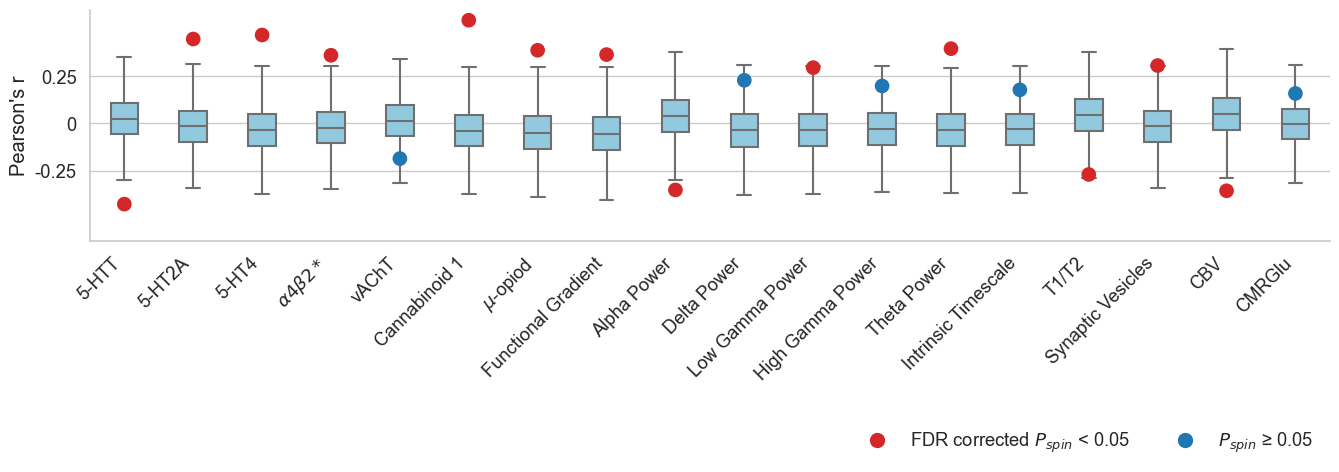

In [8]:
# plot
nulls = pd.DataFrame(np.column_stack([nulls_enigma.get(s) for s in df_enigma['source']]))
nulls.columns = list(df_enigma['source'])

color = ((df_enigma['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]

x = np.arange(df_enigma.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(16,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_enigma["rho"],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25], ylabel="Pearson's r")
ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(df_enigma['target'], rotation=45, ha="right")

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='FDR corrected $P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

plt.savefig(path + 'figures/Figure4.jpg', bbox_inches="tight", dpi=300) 